## Running a VQE Simulation for H2 using pennylane qchem tools.

Import all necessary pennylane packages, as well as our user-defined run_vqe function, which serves to shorten the notebook & make the code cleaner.

In [2]:
import sys
sys.path.append('../')
from run_vqe import *

import pennylane as qml
import numpy as np

Use pennylane's qchem tools to generate our hamiltonian from the h2.xyz file. 

In [3]:
name = 'h2'
geometry = 'h2.xyz'
charge = 0
multiplicity = 1
basis_set = 'sto-3g'

hamiltonian, nr_qubits = qml.qchem.generate_hamiltonian(
    name,
    geometry,
    charge,
    multiplicity,
    basis_set,
    n_active_electrons=2,
    n_active_orbitals=2,
    mapping='jordan_wigner'
)

Define our device and ansatz

In [4]:
dev = qml.device("default.qubit", wires=4)


def ansatz(params, wires=[0,1,2,3]):
    qml.BasisState(np.array([1, 1, 0, 0]), wires=wires)
    for i in wires:
        qml.RY(params[i], wires=wires[i])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[2], wires[3]])
    qml.CNOT(wires=[wires[1], wires[2]])
    for i in wires:
        qml.RY(params[i+4], wires=wires[i])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[2], wires[3]])
    qml.CNOT(wires=[wires[1], wires[2]])

Create our cost function using pennylane's VQECost function, and initialize all our constants for the upcoming optimization.

In [5]:
cost = qml.VQECost(ansatz, hamiltonian, dev)
init_params = np.random.uniform(low=0, high=2*np.pi, size=8)
max_iterations = 500
step_size = 0.5
conv_tol = 1e-06

Run both VQE runs using our user-defined run_vqe function, which takes the arguments cost_fn, max_iterations, inital_params, type of optimizer, and optimization step size. To understand more about how this condensation works check out run_vqe.py located in this folder.

In [ ]:
qng_run = run_vqe(cost_fn=cost, max_iter=max_iterations, initial_params=init_params, opt='QNGOptimizer', opt_step=0.05, diag_approx=True)
vanilla_run = run_vqe(cost_fn=cost, max_iter=max_iterations, initial_params=init_params, opt='GradientDescentOptimizer', opt_step=0.05)

Iteration = 0,  Ground-state energy = -0.00012510 Ha,  Convergence parameter = 0.06236854 Ha
Iteration = 20,  Ground-state energy = -0.84349828 Ha,  Convergence parameter = 0.01667271 Ha
Iteration = 40,  Ground-state energy = -1.06921723 Ha,  Convergence parameter = 0.00566426 Ha
Iteration = 60,  Ground-state energy = -1.11251248 Ha,  Convergence parameter = 0.00056631 Ha
Iteration = 80,  Ground-state energy = -1.11673460 Ha,  Convergence parameter = 0.00006302 Ha
Iteration = 100,  Ground-state energy = -1.11725617 Ha,  Convergence parameter = 0.00000900 Ha
Iteration = 120,  Ground-state energy = -1.11733417 Ha,  Convergence parameter = 0.00000142 Ha
Iteration = 0,  Ground-state energy = 0.04689008 Ha,  Convergence parameter = 0.01535336 Ha
Iteration = 20,  Ground-state energy = -0.30537170 Ha,  Convergence parameter = 0.01771641 Ha
Iteration = 40,  Ground-state energy = -0.58885002 Ha,  Convergence parameter = 0.01053864 Ha
Iteration = 60,  Ground-state energy = -0.74163312 Ha,  Conve

All that's left is to plot the results! As expected, the QNG out-perfomed the vanilla gradient descent optimization method. 

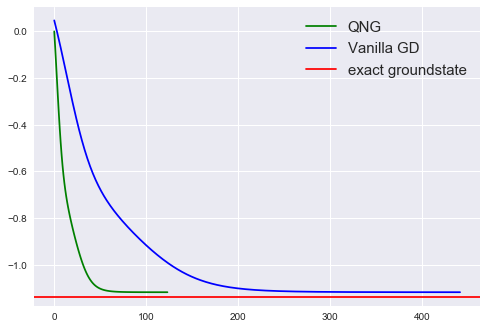

In [12]:
from matplotlib import pyplot as plt
ax = plt.axes()

plt.style.use("seaborn")
plt.plot(qng_run, color='g', label='QNG')
plt.plot(vanilla_run, color='b', label='Vanilla GD')
ax.axhline(y = -1.136189454088, label='exact groundstate', color='red')

plt.legend(fontsize=15)
plt.show()